<a href="https://colab.research.google.com/github/MarufAnsari/Case-Study-who-could-survive-Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Case Study : Who would survive Titanic**



In this project, we will use the data of the passengers and crew on the Titanic to predict who survived the tragedy. We will not go through all the steps and go directly to the EDA part by using an existing Titanic dataset from Kaggle.com.


###**BRIEF PEEK INTO THE DATASET**
Before we do EDA, we need to peek into the dataset a little to see what the data looks like and what features does it have. The file we have downloaded is .csv file.

In [36]:
# import packages needed for the procedure 
import pandas as pd
import numpy as np
import io

from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [37]:
#read data as csv file
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

#check the dimension of the table
print("The dimension of the table is  : ", df.shape)

The dimension of the table is  :  (891, 12)


As we can see above, the dimension of the table is (891, 12) which means there are 891 rows and 12 columns in the table. Each row in the table represents a passenger or a member of the crew, each column represents the information for that person.

Let's look at the first 5 rows of our dataset.

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


By showing the first 5 rows of the data, we can see the data is a mixture of numerical (PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare), categorical (Sex, Cabin, Embarked), and text data (Name, Ticket). Technically, Survived and Pclass are categorical too, but they are represented in number form in this data. There are missing values too, which are represented as "NaN" as in the "Cabin" column.

The purpose of this project is to predict the "Survived" variable using other variables. "Survived" variable is also known as the "target" and other variables are also known as "features."

###**EXPLORATORY DATA ANALYSIS (EDA)**

EDA is used to explore the target and features so we know if we will need to transform or normalize some of the features based on their distribution, delete some because it might not give us any information in predicting future outcomes, or create some new features that might be useful for prediction.

It's always good if we start our EDA process by asking lots of questions. Then we can generate figures and tables to answer these question. For visualization, I will mainly use matplotlib and yellowbrick.

To start with, I will ask following simple questions and then try to fill in the answers with some figures and tables :

1. What do the variables look like? For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are they in different categories?

2. Are the numerical variables correlated?

3. Are the distributions of numerical variables the same or different among survived and not survived? Is the survival rate different for different values? For example, were people more likely to survive if they were younger?

4. Are there different survival rates in different categories? For example, did more women survived than man?

**WHAT DO THE VARIABLES LOOK LIKE?**

To answer this question, first I'm going to check the summary of the variables, then make some histograms for the numerical variables, and some barplots for the categorical variables.

In [39]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


For all the numerical variables, we will know the average (mean), standard deviation (std), minimum value (min), maximum value (max) and different percentile (25%, 50% and 75%) of the data. Also from the count of data, we could know that there are missing values for some of the variables. For example, the "Age" variable has only 714 data points instead of 891.

In [40]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Byles, Rev. Thomas Roussel Davids",male,347082,B96 B98,S
freq,1,577,7,4,644


For all the object variables (categorical and text), we can see how many categories are in each variable from the "unique" row. For example, the "Sex" variable has only 2 categories.

Summary of all the variables in tables like this can give us a very rough idea of how the variables look. However, to get more details, we will need to dive deeper and use additional visualization techniques.

**Histograms of the numerical variables**

Histograms are used to visualize the distribution of numerical data. In our data set, "PassengerId" are unique numbers from 1-891 to label each person and "Survived" and "Pclass" are also categorical data, so we will not plot a histogram for these variables.

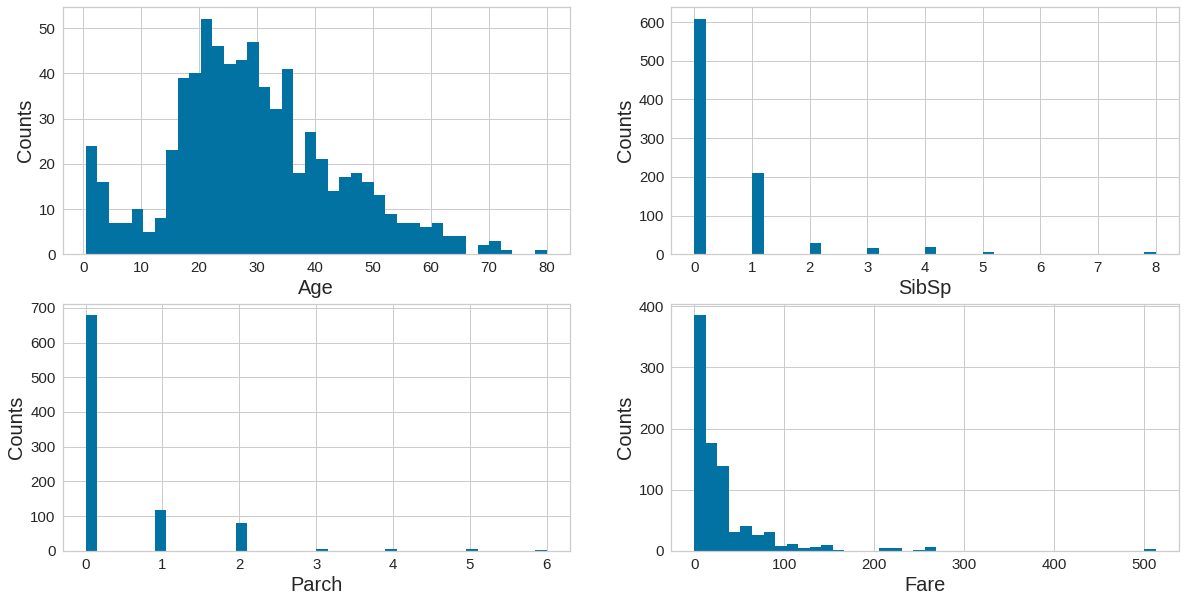

In [41]:
# import visualization packages
import matplotlib.pyplot as plt

# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

# make subplots
fig, axes = plt.subplots(nrows=2, ncols=2)

# specify the features of interest
num_features = ['Age','SibSp','Parch','Fare']
x_axes = num_features
y_axes = ['Counts','Counts','Counts','Counts']

#draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes) :
  ax.hist(df[num_features[idx]].dropna(),bins=40)
  ax.set_xlabel(x_axes[idx],fontsize=20)
  ax.set_ylabel(y_axes[idx],fontsize=20)
  ax.tick_params(axis='both',labelsize=15)

From the histogram, we see that all the values in the variables seem in the correct range. Most of the passengers are around 20 to 30 years old and don't have siblings or relatives with them. A large amount of the tickets sold were less than \$50. There are very few tickets sold where the fare was over \$500.

**Barplot for the categorical data**

Next we will create barplots for the categorical variables in the data set. Since "Ticket" and "Cabin" have too many levels (more than 100), we will not make the barplot for these.

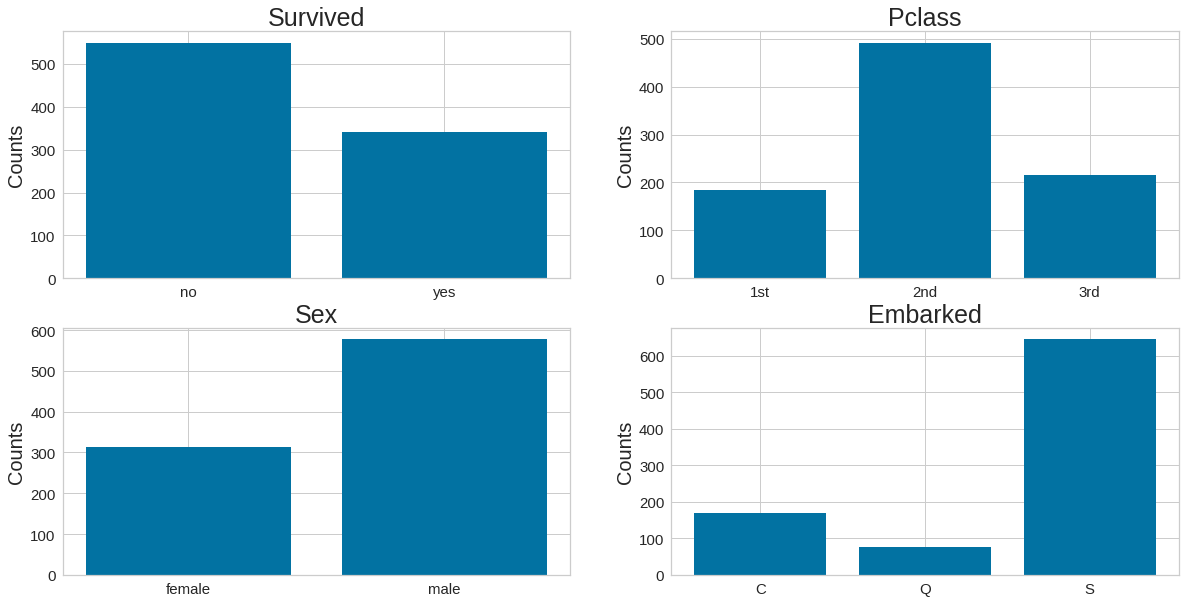

In [42]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

# make subplots
fig, axes = plt.subplots(nrows=2, ncols=2)

# make the data read to feed into the visualizer
x_survived = df.replace({'Survived':{1:'yes', 0:'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
y_survived = df.replace({'Survived':{1:'yes', 0:'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0,0].bar(x_survived, y_survived)
axes[0,0].set_title('Survived', fontsize=25)
axes[0,0].set_ylabel('Counts', fontsize=20)
axes[0,0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visualizer
x_Pclass = df.replace({'Pclass':{1:'1st', 2:'2nd', 3:'3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
y_Pclass = df.replace({'Pclass':{1:'yes', 2:'2nd', 3:'3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0,1].bar(x_Pclass,y_Pclass)
axes[0,1].set_title('Pclass', fontsize=25)
axes[0,1].set_ylabel('Counts', fontsize=20)
axes[0,1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visualizer
x_sex = df.groupby('Sex').size().reset_index(name='Counts')['Sex']
y_sex = df.groupby('Sex').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[1,0].bar(x_sex,y_sex)
axes[1,0].set_title('Sex', fontsize=25)
axes[1,0].set_ylabel('Counts', fontsize=20)
axes[1,0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visualizer
x_embarked = df.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
y_embarked = df.groupby('Embarked').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[1,1].bar(x_embarked,y_embarked)
axes[1,1].set_title('Embarked', fontsize=25)
axes[1,1].set_ylabel('Counts', fontsize=20)
axes[1,1].tick_params(axis='both', labelsize=15)

**Are the numerical variables correlated ?**

In order to get a sense of whether the numerical variables in our data set are correlated, we will create a Pearson Ranking visualization. 

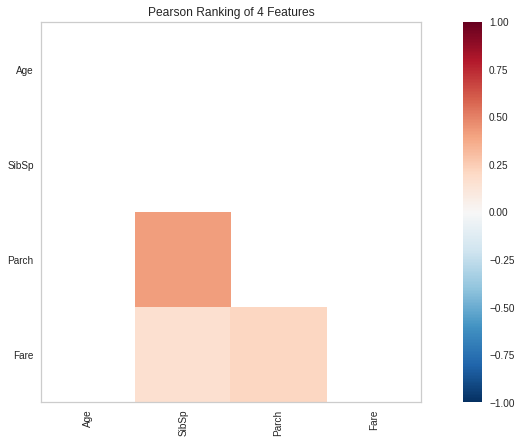

In [44]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df[num_features].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')

# Fit the data to the visualizer
visualizer.fit(X)
# Transform the data
visualizer.transform(X)
# Draw/show/poof the data
visualizer.poof()

From the Pearson ranking figure above, we can see that the correlation between variables are low (<0.5).

**Are the distribution of numerical vairables the same or different among survived and not survived ?**

Next, we will compare the distributions of numerical variables between passengers that survived and those that did not survive to see if there are any significant differences. We can do this with a Parallel Coordinates visualization.

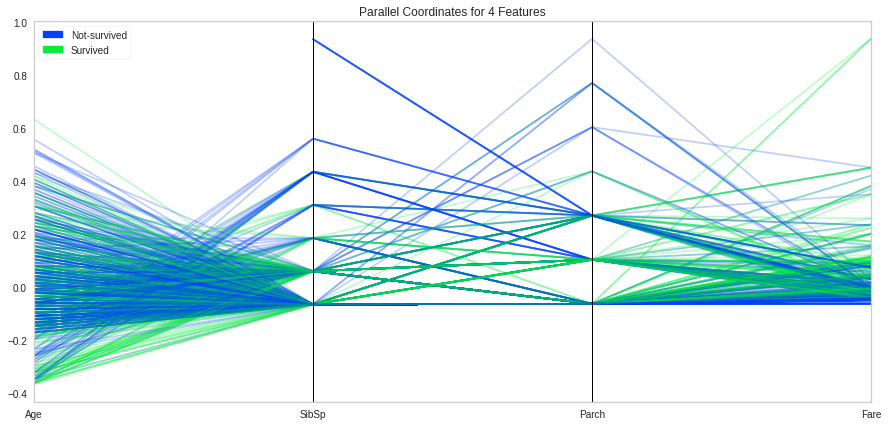

In [52]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

#import packages
from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target
classes = ['Not-survived','Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

# copy data to a new dataframe
data_norm = df.copy()

# normalize data to 0-1 range
for feature in num_features :
  data_norm[feature] = (df[feature]-df[feature].mean(skipna=True)) / (df[feature].max(skipna=True)-df[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].to_numpy()
Y = df.Survived.to_numpy()

# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

# Fit the data to the visualizer, transform and draw/show/poof the data
visualizer.fit(X,Y)
visualizer.transform(X)
visualizer.poof()

We can see from the figure above that passengers with more siblings on the boat have a higher death rate. We can also see that passengers that paid a higher fare had a higher survival rate.

**Are there different survival rates in different countries ?**

Speaking of survival rates, how did they differ across our categorical variables ?

We can get a sense of this by creating faceted stacked barplots for each variable. 

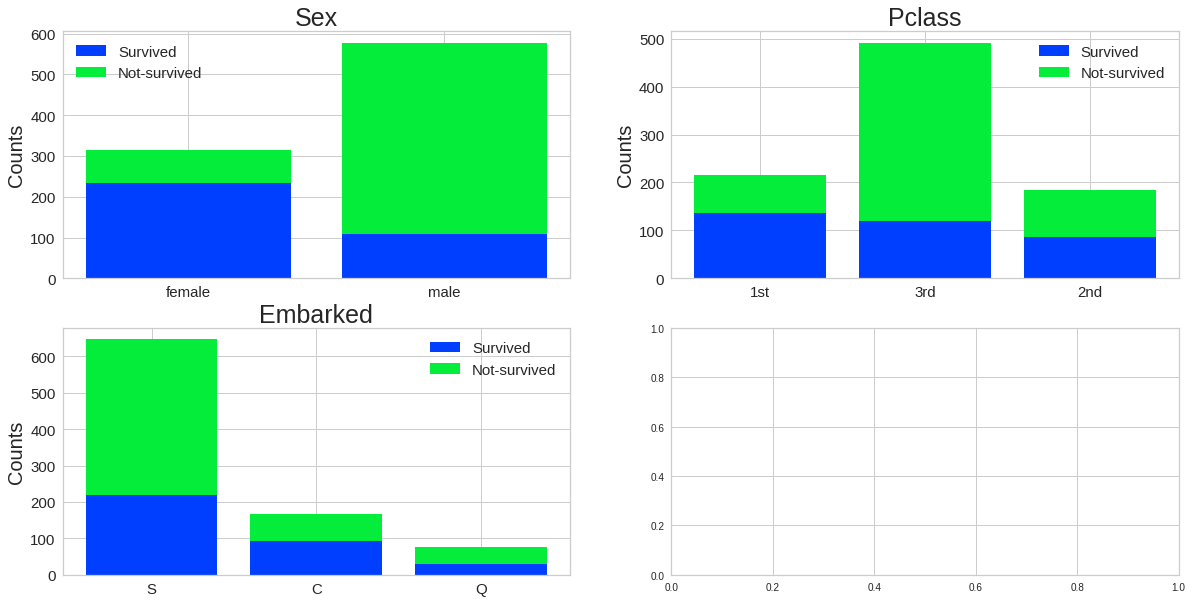

In [74]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

# make subplots
fig, axes = plt.subplots(nrows=2, ncols=2)

# make the data read to feed into the visulizer
sex_survived = df.replace({'Survived' : {1:'Survived', 0:'Not-survived'}})[df['Survived']==1]['Sex'].value_counts()
sex_not_survived = df.replace({'Survived' : {1:'Survived', 0:'Not-survived'}})[df['Survived']==0]['Sex'].value_counts()
sex_not_survived = sex_not_survived.reindex(index=sex_survived.index)

# make the bar plot
p1 = axes[0,0].bar(sex_survived.index, sex_survived.values)
p2 = axes[0,0].bar(sex_not_survived.index, sex_not_survived.values, bottom=sex_survived.values)
axes[0,0].set_title('Sex', fontsize=25)
axes[0,0].set_ylabel('Counts', fontsize=20)
axes[0,0].tick_params(axis='both', labelsize=15)
axes[0,0].legend((p1[0],p2[0]), ('Survived','Not-survived'), fontsize=15)

#make the data read to feed into the visualizer
Pclass_survived = df.replace({'Survived' : {1:'Survived', 0:'Not-survived'}}).replace({'Pclass' : {1:'1st', 2:'2nd', 3:'3rd'}})[df['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = df.replace({'Survived' : {1:'Survived', 0:'Not-survived'}}).replace({'Pclass' : {1:'1st', 2:'2nd', 3:'3rd'}})[df['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index=Pclass_survived.index)

# make the bar plot
p3 = axes[0,1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0,1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0,1].set_title('Pclass', fontsize=25)
axes[0,1].set_ylabel('Counts', fontsize=20)
axes[0,1].tick_params(axis='both', labelsize=15)
axes[0,1].legend((p3[0],p4[0]), ('Survived','Not-survived'), fontsize=15)

# make the data read to feed into the visulizer
embarked_survived = df.replace({'Survived' : {1:'Survived', 0:'Not-survived'}})[df['Survived']==1]['Embarked'].value_counts()
embarked_not_survived = df.replace({'Survived' : {1:'Survived', 0:'Not-survived'}})[df['Survived']==0]['Embarked'].value_counts()
embarked_not_survived = embarked_not_survived.reindex(index=embarked_survived.index)

# make the bar plot
p5 = axes[1,0].bar(embarked_survived.index, embarked_survived.values)
p6 = axes[1,0].bar(embarked_not_survived.index, embarked_not_survived.values, bottom=embarked_survived.values)
axes[1,0].set_title('Embarked', fontsize=25)
axes[1,0].set_ylabel('Counts', fontsize=20)
axes[1,0].tick_params(axis='both', labelsize=15)
axes[1,0].legend((p5[0],p6[0]), ('Survived','Not-survived'), fontsize=15)

As we can see from figures above, more females survived than men and the death rates in the 3rd ticket class and the embarkation from Southampton port are much higher than the others.

###**Feature Selection and Feature Engineering**

In this step, we will do lots of things to our data such as drop some features, fill in missing values, log transformations, and One Hot Encoding for the categorical feature

**Dropping features of no use**

We will delete the features "PassengerId", "Name", "Ticket" and "Cabin" from our model. The reasons are as follows:

1. PassengerId: just a series of numbers from 1 - 891 which is used to label each person.

2. Name: the names of all the passengers, which might give some information like if there are some people are related based on the last names. But to simplify things up at this stage, I will pass this feature.

3. Ticket and Cabin: too many levels with unknown information.

**Filling in missing values**

From EDA, we know there are some missing value in "Age", "Cabin" and "Embarked" variables. Since we are not going to use "Cabin" feature, we will just fill in "Age" and "Embarked." We will fill the missing values in "Age" using the median age and fill the missing value in "Embarked" with "S" since there are only 2 values missing and "S" is the most represent in the dataset.

From here on, we will use functions for data preprocessing so we can reuse them on new test data without the pain of going through all the process again. And also, these functions can be used to generate pipelines to make things even easier.

In [55]:
# fill the missing age data with median value
def fill_na_median(df, inplace=True) :
  return df.fillna(df.median(), inplace=inplace)

fill_na_median(df['Age'])

# check the result
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [56]:
# fill with the most represented value
def fill_na_most(df, inplace=True) :
  return df.fillna('S', inplace=inplace)

fill_na_most(df['Embarked'])

# check the result
df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

**Log transformation of the fare**

From the histograms, we can see that the distribution of "Fare" is highly right-skewed. For dealing with highly-skewed positive data, one of the strategies that can be used is log-transformation, so the skewness will be less. Since the minimum is 0, we will add 1 to the raw value, so there will not be any errors when using log-transformation.

In [57]:
# log transformation
def log_transformation(df) :
  return df.apply(np.log1p)

df['Fare_log1p'] = log_transformation(df['Fare'])

# check the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log1p
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


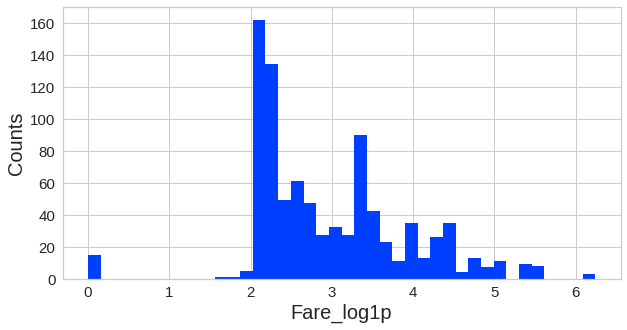

In [58]:
# check the distribution using histogram
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)

plt.hist(df['Fare_log1p'],bins=40)
plt.xlabel('Fare_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

We can see from the figure above, after log-transformation the data is much less skewed.

**One Hot Encoding for categorical features**

We will use One Hot Encoding on the categorical features to transform them into numbers.

In [61]:
# get the catgorical data
cat_features = ['Pclass', 'Sex', 'Embarked']
data_cat = df[cat_features]
data_cat = data_cat.replace({'Pclass': {1:'1st', 2:'2nd', 3:'3rd'}})

# One Hot Encoding
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
data_cat_dummies.head()

,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


###**MODEL TRAINING AND MODEL EVALUATION**

Here we will put model training and model evaluation in one part since Yellowbrick is a very good package that can wrap the model and creates good visualization of the model performance, making model evaluation much easier and fun.

**Prepare data for model training and evaluation**

Before we train the model, we will need to split the data into 2 sets: training and validation. We will use the training dataset to train the model and use the validation dataset to evaluate the model.

In [63]:
# create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']
data_model_x = pd.concat([df[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = df.replace({'Survived': {1:'Survived', 0:'Not_survived'}})['Survived']

In [65]:
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
x_train, x_val, y_train, y_val = train_test_split(data_model_x, data_model_y, test_size=0.3, random_state=11)

#number of samples in each set
print('No. of samples in training set : ', x_train.shape[0])
print('No. of samples in validation set : ', x_val.shape[0])

# Survived and Not-survived
print('\n')
print('No. of survived and not-survived in the training set : ')
print(y_train.value_counts())
print('\n')
print('No. of survived and not-survived in the validation set : ')
print(y_val.value_counts())

No. of samples in training set :  623
No. of samples in validation set :  268


No. of survived and not-survived in the training set : 
Not_survived    373
Survived        250
Name: Survived, dtype: int64


No. of survived and not-survived in the validation set : 
Not_survived    176
Survived         92
Name: Survived, dtype: int64


###**Model training and evaluation visualisation using Yellowbrick**
Since the purpose of this project is to predict if a passenger has survived or not, it's a classification problem. There are lots of algorithms that can be used to do classification modeling. Here we will use logistic regression.

There are also lots of evaluation metrics you can use to evaluate your model for classification problem. Here we will use Confusion Matrix, precision, recall, F1 score, and ROC curve.

**Confusion matrix**

With Yellowbrick, we can create a visual confusion matrix that will allow us to easily see how well we were able to predict and compute our accuracy score. 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


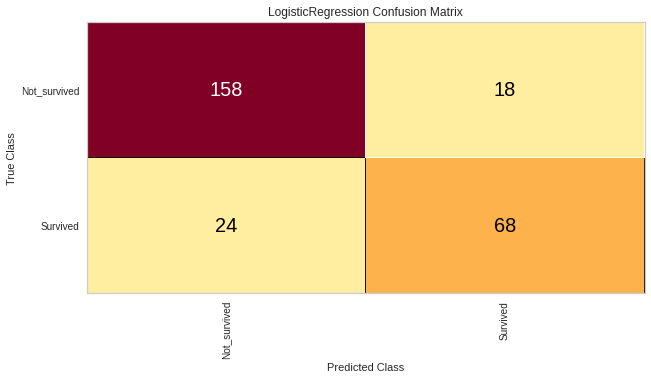

In [68]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Not_survived', 'Survived']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# it fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data and then creates the confusion_matrix from scikit learn.
cm.score(x_val, y_val)
# change fontsize of the labels in the figure
for label in cm.ax.texts:
  label.set_size(20)

cm.poof()

As we can see from the confusion matrix, the accuracy of the model is (158+68) / (158+24+18+68) = 84.33%. It's much higher than random guess, which is 50.00%. If we use majority guess, the accuracy will be a little higher which is 176/268 = 65.67%, but still lower than our model. It seems like our model worked pretty well which means we should use a machine learning model to predict who survived in this instance.

**Precision, Recall and F1-Score**

We can also visually generate a classification report, which includes precision, recall, and F1 score for our classification model. 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


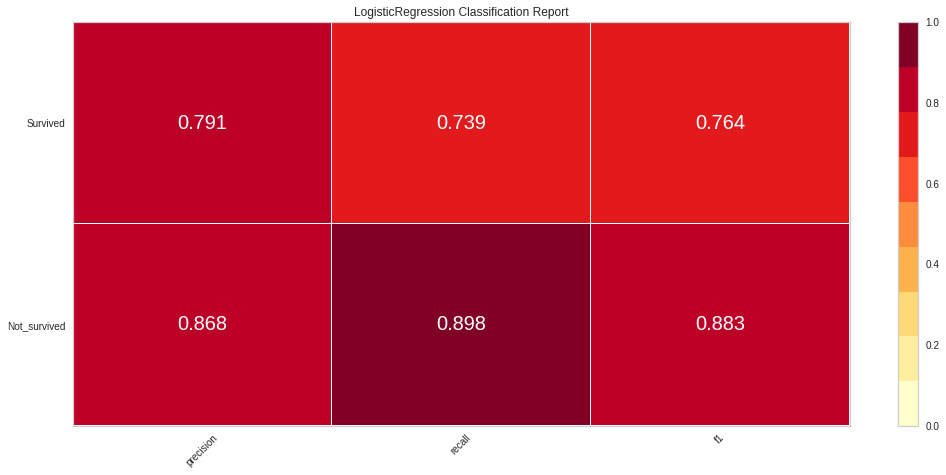

In [69]:
# set the size of the figure and the font size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 20

# instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

# Fit the training data to the visualizer
visualizer.fit(x_train,y_train)
# Evaluate the model on the test data
visualizer.score(x_val,y_val)
# Draw/show/poof the data
g = visualizer.poof()

The precision, recall, and F1 score result further confirmed that the model is performing relatively well.

**ROC curve and AUC**

In addition to the previous two methods, we can also evaluate our classification model using a ROC curve for each class. 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


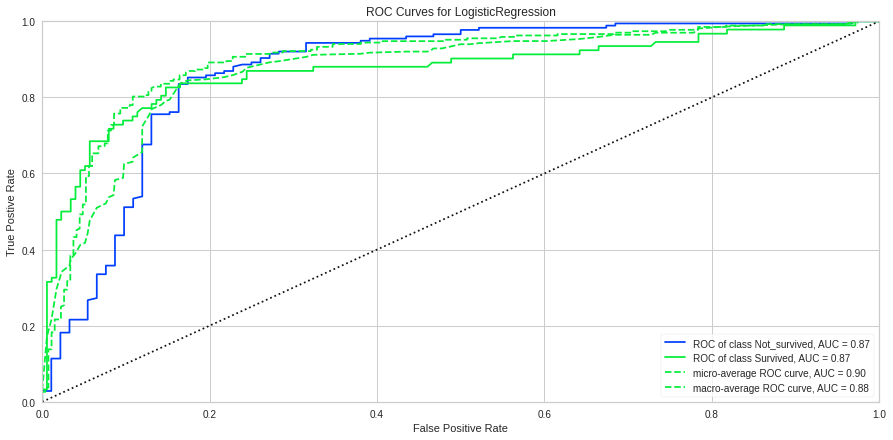

In [70]:
# instantiate the visualizer
visualizer = ROCAUC(model)

# Fit the training data to the visualizer
visualizer.fit(x_train,y_train)
# Evaluate the model on the test data
visualizer.score(x_val,y_val)
# Draw/show/poof the data
g = visualizer.poof()

In the ROC Curve above, the dotted diagonal line in the pictures shows when the result is randomly guessed. A good model should be above that line.

###**Conclusion**
In this post, We have used the Titanic dataset. Although the model we trained looked good already, there are still lots of opportunities to improve.